In [10]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2


# необходимо для корректного импорта своих модулей в JupyterLab
import sys
current_dir = sys.path[0]
project_dir = 'SF_DS_Pro'
last_position = current_dir.find(project_dir) + len(project_dir)
project_path = current_dir[:last_position]
sys.path.append(project_path)


%matplotlib inline
import matplotlib.pyplot as plt # библиотека визуализации
import seaborn as sns
# sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10, 8)})


import warnings
warnings.filterwarnings('ignore')


from IPython.core.display import HTML
HTML("""
<style>
.p-Widget.jp-OutputPrompt.jp-OutputArea-prompt:empty {
  padding: 0;
  border: 0;
}
</style>
""")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('data/ab_data.zip')

In [13]:
df

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1
...,...,...,...,...
290477,751197,2017-01-03,A,0
290478,945152,2017-01-12,A,0
290479,734608,2017-01-22,A,0
290480,697314,2017-01-15,A,0


user_id	- идентификатор пользователя, зашедшего на сайт

timestamp - дата события

group - группа теста (контрольная или тестовая)

converted - совершил пользователь целевое действие (нажатие кнопки «добавить в корзину» на сопутствующем товаре) или нет. 1 — да, 0 — нет.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [15]:
# Конвертирую datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [16]:
# Тут object конвертируется в string
df = df.convert_dtypes()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    290482 non-null  Int64         
 1   timestamp  290482 non-null  datetime64[ns]
 2   group      290482 non-null  string        
 3   converted  290482 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), string(1)
memory usage: 9.4 MB


In [18]:
# Количество пользователей распределенное по группам
# Группы полностью идентичны
df.groupby('group').agg({'user_id': 'count'})

,user_id
group,
A,145241
B,145241


Группы разделены абсолютно равномерно. В A и B одинакове количество пользователей, 145241.

Группирую данные по дням и группам A и B. В группах считаю общее количество пользователей через count. 

И количество совершивших действие по добавлению дополнительного товара в корзину.

In [19]:
daily_df = df.groupby(['timestamp', 'group']).agg({'user_id': 'count', 'converted': 'sum'})
daily_df

user_id  converted
timestamp  group                    
2017-01-02 A         2851        357
           B         2848        339
2017-01-03 A         6584        749
           B         6620        754
2017-01-04 A         6573        797
           B         6538        763
2017-01-05 A         6419        791
           B         6509        743
2017-01-06 A         6604        762
           B         6735        834
2017-01-07 A         6595        793
           B         6604        765
2017-01-08 A         6692        793
           B         6702        810
2017-01-09 A         6624        792
           B         6619        783
2017-01-10 A         6657        752
           B         6690        844
2017-01-11 A         6686        790
           B         6672        772
2017-01-12 A         6508        794
           B         6631        815
2017-01-13 A         6562        769
           B         6510        730
2017-01-14 A         6555        830
           B         6607        791
2017-01-15 A         6710        814
           B         6556        743
2017-01-16 A         6604        801
           B         6526        779
2017-01-17 A         6606        816
           B         6527        828
2017-01-18 A         6484        807
           B         6602        814
2017-01-19 A         6562        787
           B         6555        758
2017-01-20 A         6536        752
           B         6690        786
2017-01-21 A         6765        851
           B         6544        757
2017-01-22 A         6587        782
           B         6649        782
2017-01-23 A         6717        847
           B         6627        802
2017-01-24 A         3760        441
           B         3680        446

In [20]:
# Сбрасыаю индексы в отдельные столбцы что бы избежать вложенности и упростить таблицу
daily_df.reset_index(inplace=True)

# Перименую столбец, что бы он соответствовал сути
daily_df.rename(columns={'user_id': 'users_count'}, inplace=True)

Для завершения этапа подготовки данных к анализу нам осталось рассчитать конверсию на каждый день проведения A/B-тестирования.

In [21]:
daily_df['conversion'] = (daily_df['converted'] / daily_df['users_count'] * 100).round(2)
daily_df

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.52
1,2017-01-02,B,2848,339,11.9
2,2017-01-03,A,6584,749,11.38
3,2017-01-03,B,6620,754,11.39
4,2017-01-04,A,6573,797,12.13
5,2017-01-04,B,6538,763,11.67
6,2017-01-05,A,6419,791,12.32
7,2017-01-05,B,6509,743,11.41
8,2017-01-06,A,6604,762,11.54
9,2017-01-06,B,6735,834,12.38


Чему была равна конверсия (в процентах) в группе А 5 января 2017 года? Ответ округлите до второго знака после запятой.

In [22]:
check_day = pd.to_datetime('2017-01-05')
mask = (daily_df['group'] == 'A') & (daily_df['timestamp'] == check_day)

In [24]:
check = daily_df[mask]
check['conversion'].values[0]

12.32

ВИЗУАЛЬНЫЙ АНАЛИЗ КОНВЕРСИИ В ГРУППАХ

In [17]:
from IPython.core.display import HTML
HTML("""
<style>
.p-Widget.jp-OutputPrompt.jp-OutputArea-prompt:empty {
  padding: 0;
  border: 0;
}
</style>
""")

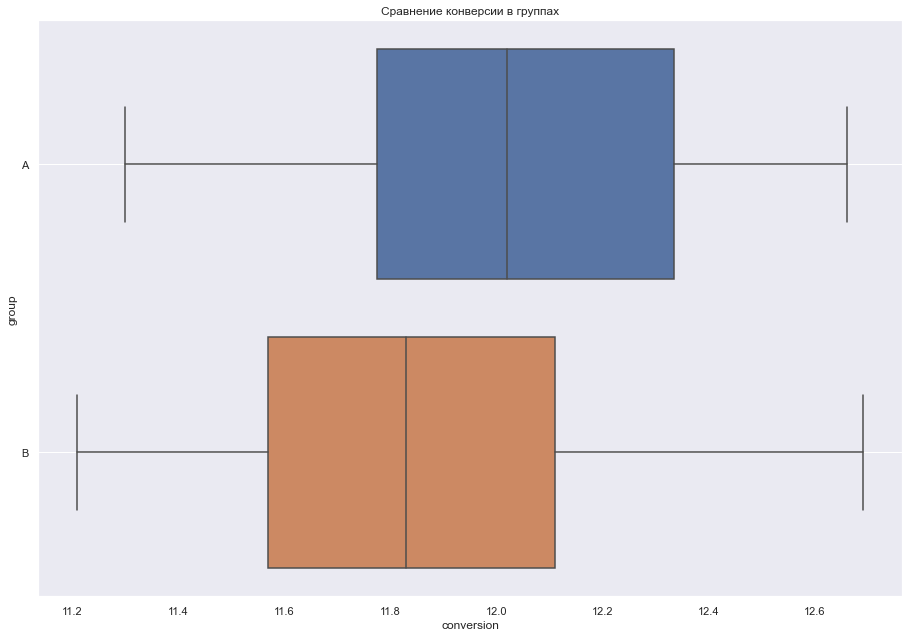

In [25]:
# создаём фигуру
fig = plt.figure(figsize=(12, 8)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_df, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid()
sns.set_style('whitegrid')

Давайте вычислим средний и медианный показатель конверсии в контрольной и тестовой группе и умножим результат на 100 (получим результат в процентах)

In [19]:
conversion_piv = daily_df.groupby('group')['conversion'].agg(['mean', 'median'])
conversion_piv

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


In [20]:
daily_df

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.90309
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361
5,2017-01-04,B,6538,763,11.670236
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964
8,2017-01-06,A,6604,762,11.538462
9,2017-01-06,B,6735,834,12.383073


Для начала ради эксперимента посмотрим, как вообще изменялись показатели ежедневной конверсии в каждой группе во времени. Для этого построим линейные графики для каждой группы: по оси абсцисс отложим дату, а по оси ординат — показатель конверсии

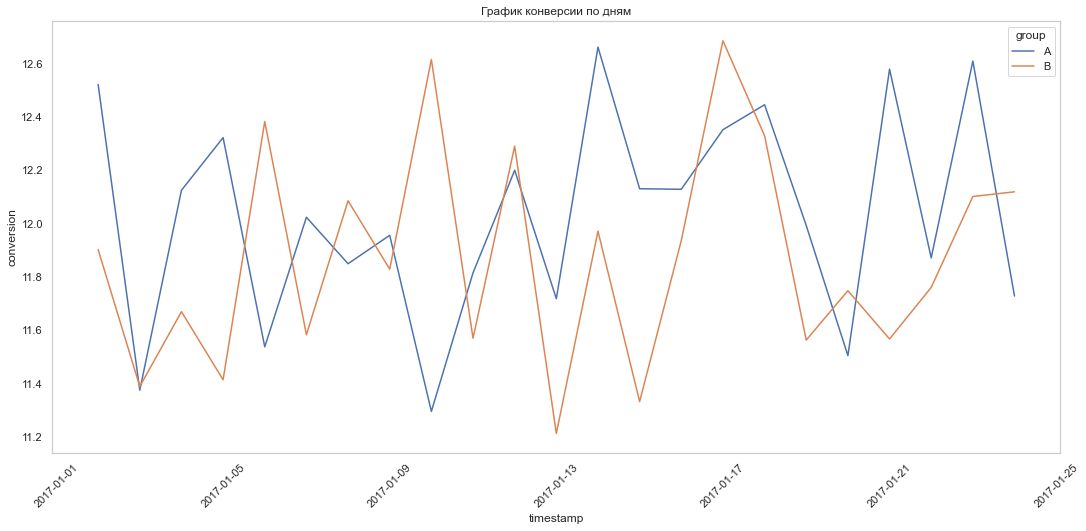

In [21]:
# создаём фигуру размером
fig = plt.figure(figsize=(14, 6))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_df,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

Что можно сказать по такому графику? Да практически ничего! Конверсия у обеих групп «скачет» день ото дня. Понять, какая из групп лучше, — практически невыполнимая задача

Выберем данные для группы А и создадим в полученной таблице новый столбец cum_users_count, в который запишем результат работы метода cumsum() по столбцу users_count:

In [22]:
# выделяем данные группы А
daily_data_a = daily_df[daily_df['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a['cum_users_count'] = daily_data_a['users_count'].cumsum()

# выводим время, количество посетителей и кумулятивное количество посетителей
daily_data_a[['timestamp', 'users_count', 'cum_users_count']]

,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031
10,2017-01-07,6595,35626
12,2017-01-08,6692,42318
14,2017-01-09,6624,48942
16,2017-01-10,6657,55599
18,2017-01-11,6686,62285


In [23]:
# вычисляем кумулятивную сумму количества посетителей
daily_df['cum_users_count'] = daily_df.groupby(['group'])['users_count'].cumsum()

# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_df['cum_converted'] = daily_df.groupby(['group'])['converted'].cumsum()

# вычисляем кумулятивную конверсию
daily_df['cum_conversion'] = daily_df['cum_converted'] / daily_df['cum_users_count'] * 100

daily_df

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.90309,2848,339,11.90309
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806
5,2017-01-04,B,6538,763,11.670236,16006,1856,11.595652
6,2017-01-05,A,6419,791,12.322792,22427,2694,12.012307
7,2017-01-05,B,6509,743,11.414964,22515,2599,11.543416
8,2017-01-06,A,6604,762,11.538462,29031,3456,11.904516
9,2017-01-06,B,6735,834,12.383073,29250,3433,11.736752


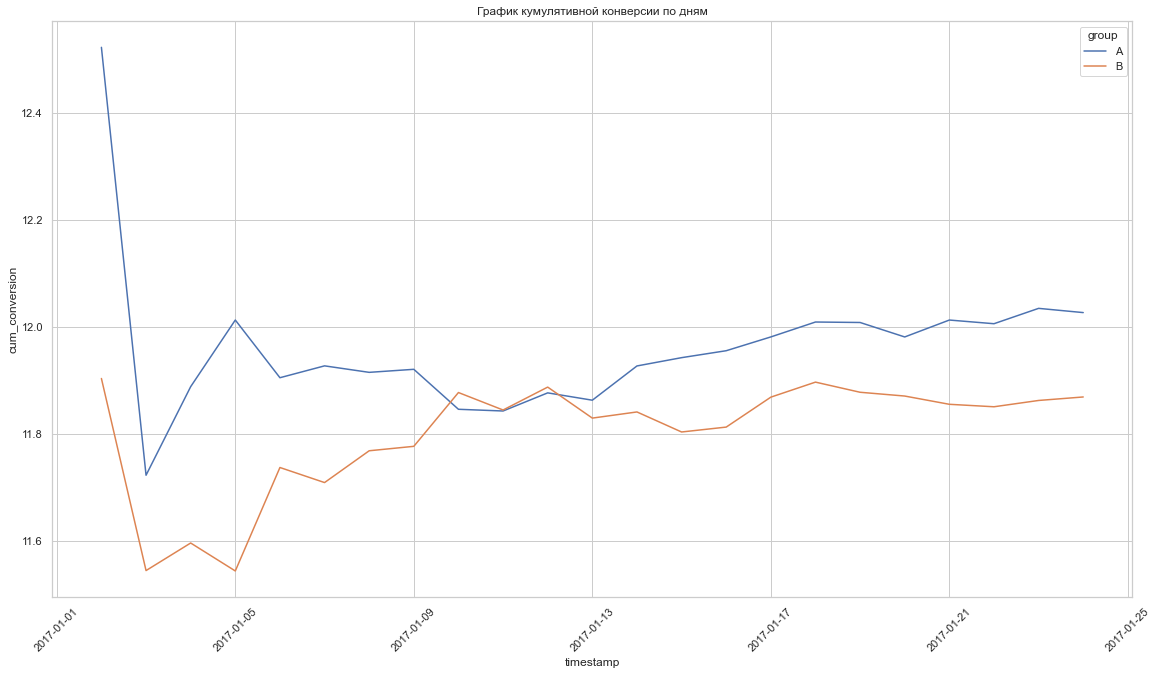

In [24]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(15, 8))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_df, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True)

СТАТИСТИЧЕСКИЙ ТЕСТ ДЛЯ КОНВЕРСИИ

Оказывается, интересующий нас признак того, осуществлена конверсия пользователя или нет, — это случайная величина, имеющая распределение Бернулли. Такая случайная величина имеет два возможных исхода: 

успех (1) — пользователь осуществил конверсию (совершил целевое действие); 
неуспех (0) — пользователь не осуществил конверсию. 
Мы помним, что конверсия — это доля (пропорция) пользователей, которые добавили сопутствующий товар в корзину. То есть истинная конверсия — вероятность «успеха» (традиционно обозначают как ), или вероятность того, что пользователь совершит целевое действие.



Для проверки гипотезы равенства пропорций мы можем воспользоваться уже знакомым нам z-критерием для пропорций. Этот критерий является наиболее популярным для задачи определения статистической значимости изменения конверсии.

In [25]:
df

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1
...,...,...,...,...
290477,751197,2017-01-03,A,0
290478,945152,2017-01-12,A,0
290479,734608,2017-01-22,A,0
290480,697314,2017-01-15,A,0


In [26]:
# Cгруппируем исходные данные по признаку группы и рассчитаем количество «успехов» 
# (сумма по столбцу converted) и общее количество наблюдений (количество непустых значений в столбце converted) для каждой группы.
converted_piv = df.groupby('group')['converted'].agg(['sum', 'count'])
converted_piv

,sum,count
group,,
A,17467,145241
B,17238,145241


Теперь у нас с вами есть всё для того, чтобы проверить гипотезу о равенстве конверсий. 

Итак, будем проверять следующую новую гипотезу:

Ho: pa = pb, то есть конверсии в группах А и B равны.
При правосторонней альтернативной гипотезе (ранее из кумулятивных графиков мы видели, что кумулятивная конверсия в группе А выше, чем в группе B, поэтому мы хотим удостовериться в этом с помощью статистического теста, и нам подойдёт правосторонняя гипотеза):

Ha: pa > pb, то есть конверсия в группе А выше, чем конверсия в группе B.
Зададим уровень значимости alpha = 0.05 и будем сравнивать полученное p-value с ним. По умолчанию функция proportions_ztest() возвращает z-статистику и p-value для двусторонней альтернативной гипотезы (конверсии в группах не равны). 

Z-статистика нас пока что не интересует, а вот p-value занесём в отдельную переменную для дальнейшего сравнения с уровнем значимости.

In [27]:
# Импортируем функцию proportions_ztest() из модуля statsmodels:
from statsmodels.stats.proportion import proportions_ztest

In [29]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости

# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], # число "успехов"
    nobs=converted_piv['count'], # общее число наблюдений
    alternative='larger'
    )

# выводим результат на экран
print(f'p-value: {round(p_value, 2)}')

# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print(f"Отвергаем нулевую гипотезу. {H0}")
    print(f"Альтернативная гипотеза. H1: {H1}")
else:
    print(f"Принимаем нулевую гипотезу. {H0}")

p-value: 0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны
